In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
observations = 1000 

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise 

np.savez('TF_Intro', inputs=generated_inputs, targets=generated_targets)

In [11]:
training_data = np.load('TF_Intro.npz')

In [13]:
input_size = 2 
output_size = 1

In [14]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size)
])

In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [16]:
model.fit(training_data['inputs'], training_data['targets'],epochs=100, verbose=2)

Epoch 1/100
32/32 - 2s - 51ms/step - loss: 39.8704
Epoch 2/100
32/32 - 0s - 6ms/step - loss: 4.7086
Epoch 3/100
32/32 - 0s - 6ms/step - loss: 1.5283
Epoch 4/100
32/32 - 0s - 5ms/step - loss: 0.6803
Epoch 5/100
32/32 - 0s - 4ms/step - loss: 0.4397
Epoch 6/100
32/32 - 0s - 4ms/step - loss: 0.3843
Epoch 7/100
32/32 - 0s - 4ms/step - loss: 0.3601
Epoch 8/100
32/32 - 0s - 3ms/step - loss: 0.3588
Epoch 9/100
32/32 - 0s - 4ms/step - loss: 0.3625
Epoch 10/100
32/32 - 0s - 4ms/step - loss: 0.3540
Epoch 11/100
32/32 - 0s - 4ms/step - loss: 0.3565
Epoch 12/100
32/32 - 0s - 5ms/step - loss: 0.3507
Epoch 13/100
32/32 - 0s - 5ms/step - loss: 0.3600
Epoch 14/100
32/32 - 0s - 5ms/step - loss: 0.3577
Epoch 15/100
32/32 - 0s - 5ms/step - loss: 0.3551
Epoch 16/100
32/32 - 0s - 5ms/step - loss: 0.3535
Epoch 17/100
32/32 - 0s - 4ms/step - loss: 0.3489
Epoch 18/100
32/32 - 0s - 4ms/step - loss: 0.3594
Epoch 19/100
32/32 - 0s - 5ms/step - loss: 0.3573
Epoch 20/100
32/32 - 0s - 5ms/step - loss: 0.3512
Epoch 2

In [19]:
model.layers[0].get_weights()

[array([[ 1.9789615],
        [-2.9817886]], dtype=float32),
 array([5.0065246], dtype=float32)]

In [22]:
model.predict_on_batch(training_data['inputs']).round(2)

array([[-14.23],
       [ 24.29],
       [ 24.55],
       [-33.59],
       [ -4.39],
       [-31.77],
       [-33.68],
       [ 17.74],
       [  1.25],
       [-27.72],
       [ -6.81],
       [ 16.58],
       [ 24.54],
       [ 17.81],
       [-24.84],
       [ 42.09],
       [ 40.61],
       [  9.38],
       [ 35.77],
       [ -3.35],
       [ -1.38],
       [ 25.93],
       [ 42.18],
       [ 30.33],
       [-27.78],
       [ -5.65],
       [-22.42],
       [ 12.96],
       [ 18.06],
       [-21.01],
       [ -0.92],
       [-25.35],
       [ -1.78],
       [ -8.28],
       [ 16.68],
       [-17.38],
       [-40.32],
       [  8.98],
       [-22.51],
       [ 40.81],
       [ 36.25],
       [ -2.66],
       [-32.91],
       [ 10.92],
       [-37.91],
       [-10.7 ],
       [ 20.27],
       [-19.92],
       [ 34.98],
       [  8.19],
       [  7.24],
       [ -1.77],
       [-20.14],
       [-21.41],
       [-11.89],
       [  9.96],
       [ 21.03],
       [ -6.94],
       [  8.18

In [23]:
training_data['targets'].round(1)

array([[-14.8],
       [ 24. ],
       [ 24.8],
       [-33.6],
       [ -4.7],
       [-31.1],
       [-33.7],
       [ 17.1],
       [  0.7],
       [-28.1],
       [ -7.4],
       [ 15.7],
       [ 24.3],
       [ 18.5],
       [-24.1],
       [ 43.4],
       [ 40.5],
       [  9.6],
       [ 37. ],
       [ -3.9],
       [ -1. ],
       [ 26.5],
       [ 41.9],
       [ 30.3],
       [-28.9],
       [ -6.5],
       [-23.2],
       [ 13.4],
       [ 18.3],
       [-20.7],
       [ -0.3],
       [-25.9],
       [ -1. ],
       [ -7.8],
       [ 17.6],
       [-17.2],
       [-41. ],
       [ 10. ],
       [-21.8],
       [ 41.3],
       [ 36.6],
       [ -1.7],
       [-32.3],
       [ 11.8],
       [-39.2],
       [-10. ],
       [ 21. ],
       [-20.9],
       [ 35.6],
       [  9.1],
       [  6.2],
       [ -1. ],
       [-19.7],
       [-21.5],
       [-13. ],
       [  9.5],
       [ 20.2],
       [ -7.4],
       [  9. ],
       [ -4.3],
       [ 12.3],
       [ 25.5],
       [

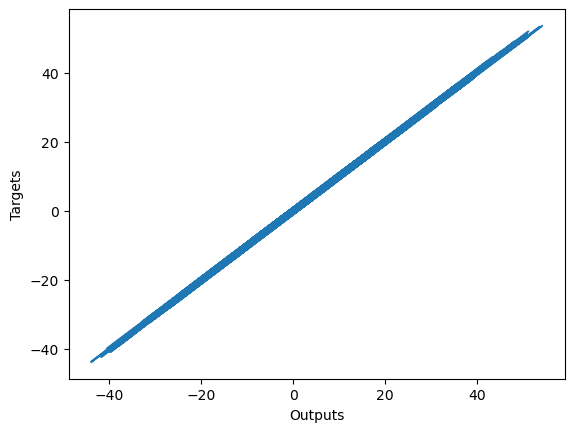

In [32]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),
        np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()